In [113]:
import struct
import random
import scipy.stats
import numpy as np
from matplotlib import pyplot

In [241]:
VARIABLE_N = 3 # three variables, temp, dir and power
SAMPLE_N = 10 # Samples
MEAS_VEC_LEN = 56 # how many bits there is in message
def gen_state(temp, direction, power_off):
    state = (
        # temperature int32 as tens of celsius
        temp,
        # direction (up or down) (int8)
        direction,
        # error check in protocol (temp xor direction)
        temp ^ direction,
        # power_off/on (single bit)
        power_off
    )
    b = struct.pack('!hhh?', *state)
    k = ''.join(format(byte, '08b') for byte in b)
    return k

In [242]:
arr = {}
temps = []
dirs = []
poffs = []
messages = np.zeros((MEAS_VEC_LEN, SAMPLE_N))
for s in range(SAMPLE_N):
    temp=random.randint(80, 280)
    direction=10 if random.random() < 0.5 else 20
    power_off=random.random() < 0.5
    temps.append(temp)
    dirs.append(direction)
    poffs.append(power_off)
    
    k = gen_state(temp, direction, power_off)
    for idx, b in enumerate(k):
        messages[idx, s] = int(b)
    print(k)

00000000101111000000000000001010000000001011011000000000
00000000101010100000000000001010000000001010000000000000
00000001000100010000000000010100000000010000010100000000
00000000110000000000000000010100000000001101010000000001
00000000101111110000000000010100000000001010101100000001
00000000101001010000000000001010000000001010111100000000
00000000100000100000000000001010000000001000100000000001
00000001000101010000000000001010000000010001111100000000
00000000100000100000000000001010000000001000100000000001
00000001000110000000000000001010000000010001001000000000


In [249]:

messages_n = np.apply_along_axis(lambda m: np.convolve(m, [1], mode='same'), axis=0, arr=messages)

In [250]:
messages_n.shape

(56, 10)

In [251]:
correlations = np.zeros((VARIABLE_N, MEAS_VEC_LEN))
for idx in range(MEAS_VEC_LEN):
    bits = messages_n[idx]
    temp_correlation, _ = scipy.stats.pearsonr(bits, temps)
    dir_correlation, _ = scipy.stats.pearsonr(bits, dirs)
    poff_correlation, _ = scipy.stats.pearsonr(bits, poffs)
    #print(correlations[:, idx], idx)
    correlations[:, idx] = np.array([temp_correlation, dir_correlation, poff_correlation])
    #print(temp_correlation, dir_correlation, poff_correlation)

In [252]:
np.abs(correlations)

array([[       nan,        nan,        nan,        nan,        nan,
               nan,        nan, 0.92311894, 0.92311894, 0.04635236,
        0.31522184, 0.77213268, 0.11428659, 0.08440775, 0.66256345,
        0.4018705 ,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan, 0.2283841 , 0.2283841 , 0.2283841 ,
        0.2283841 ,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan, 0.92311894,
        0.92311894, 0.04635236, 0.31522184, 0.51765104, 0.38423664,
        0.35496147, 0.37691785, 0.4018705 ,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
        0.58039662],
       [       nan,        nan,        nan,        nan,        nan,
               nan,        nan, 0.04761905, 0.04761905, 0.50917508,
        0.08908708, 0.21821789, 0.08908708, 0.08908708, 0.08908708,
        0.35634832,        

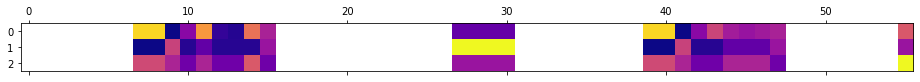

In [253]:
pyplot.matshow(np.abs(correlations))

In [254]:
pyplot.set_cmap('plasma')

<Figure size 432x288 with 0 Axes>